**Corporation Favorita wants to ensure that they have the quantity of products in stock.**


 **The purpose of this project is to build a series of machine learning models to forecast the demand of product in various locations of stores.**


**QUESTIONS**

Q. Is the train dataset complete (has all the required dates)?

Q. Which dates have the lowest and highest sales for each year?

Q. Which City is having most number of stores?

Q. Are certain stores selling more products?

Q.  Did the earthquake strike on ecuador on April 16, 2016 had a negative impact on sales?**

Q. Are sales affected by promotions?

Q. What family is with most sales?

Q. What family is with the least sales?

Q. Monthly sales trend/ over a period of time.

Q. What are the most sold items on Christmas?

Q. Sales of individual items over a period of time.


**HYPOTHESIS**

H. Promotion positively impacts sales.

H. Earthquake strike on ecuador on April 16, 2016 does not have impact on sales


In [1]:
!pip install squarify

In [2]:
!pip install --upgrade scipy


     ---------------------------------------- 40.1/40.1 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.2
    Uninstalling scipy-1.9.2:
      Successfully uninstalled scipy-1.9.2


In [3]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
from datetime import date
import squarify

In [4]:
train_data = 'C:\\Users\\USER\\Desktop\\data check\\train.csv'
stores_data= 'C:\\Users\\USER\\Desktop\\MACHINE LEARNING PROJECT\\stores.csv'
transactions_data= 'C:\\Users\\USER\\Desktop\\MACHINE LEARNING PROJECT\\transactions.csv'
oil_data= 'C:\\Users\\USER\\Desktop\\MACHINE LEARNING PROJECT\\oil.csv'
holidays_data= 'C:\\Users\\USER\Desktop\\MACHINE LEARNING PROJECT\\holidays_events.csv'

# READING DATASETS

In [5]:
#Reading train data
train_data = pd.read_csv( 'C:\\Users\\USER\\Desktop\\data check\\train.csv')
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
#Reading stores data
stores_data= pd.read_csv( 'C:\\Users\\USER\\Desktop\\MACHINE LEARNING PROJECT\\stores.csv')
stores_data

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [8]:
#renaming store column head 'type' to 'type_no'
stores_data.rename(columns={'type': 'type_no'},inplace=True)
stores_data

,store_nbr,city,state,type_no,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [9]:
#reading transactions dataset
transactions_data = pd.read_csv( 'C:\\Users\\USER\\Desktop\\MACHINE LEARNING PROJECT\\transactions.csv')
transactions_data

,date,store_nbr,transactions
0,1/1/2013,25,770
1,1/2/2013,1,2111
2,1/2/2013,2,2358
3,1/2/2013,3,3487
4,1/2/2013,4,1922
...,...,...,...
83483,8/15/2017,50,2804
83484,8/15/2017,51,1573
83485,8/15/2017,52,2255
83486,8/15/2017,53,932


In [10]:
#reading oil dataset
oil_data= pd.read_csv( 'C:\\Users\\USER\\Desktop\\MACHINE LEARNING PROJECT\\oil.csv')
oil_data

,date,dcoilwtico
0,1/1/2013,NaN
1,1/2/2013,93.14
2,1/3/2013,92.97
3,1/4/2013,93.12
4,1/7/2013,93.20
...,...,...
1213,8/25/2017,47.65
1214,8/28/2017,46.40
1215,8/29/2017,46.46
1216,8/30/2017,45.96


In [11]:
#reading holidays dataset
holidays_data = pd.read_csv( 'C:\\Users\\USER\\Desktop\\MACHINE LEARNING PROJECT\\holidays_events.csv')
holidays_data

,date,type,locale,locale_name,description,transferred
0,3/2/2012,Holiday,Local,Manta,Fundacion de Manta,False
1,4/1/2012,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,4/12/2012,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,4/14/2012,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,4/21/2012,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,12/22/2017,Additional,National,Ecuador,Navidad-3,False
346,12/23/2017,Additional,National,Ecuador,Navidad-2,False
347,12/24/2017,Additional,National,Ecuador,Navidad-1,False
348,12/25/2017,Holiday,National,Ecuador,Navidad,False


# Q1. Is the train dataset complete (has all the required dates)?

**CHECKING FOR MISSING VALUES IN VARIOUS DATASETS**

In [12]:
#checking for train missing data in percentage
null_values=pd.isnull(train_data).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/train_data.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
id,0,0.0
date,0,0.0
store_nbr,0,0.0
family,0,0.0
sales,0,0.0
onpromotion,0,0.0


In [13]:
#checking for stores missing data in percentage
null_values=pd.isnull(stores_data).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/stores_data.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
store_nbr,0,0.0
city,0,0.0
state,0,0.0
type_no,0,0.0
cluster,0,0.0


In [14]:
#checking for transactions missing data in percentage
null_values=pd.isnull(transactions_data).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/transactions_data.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
date,0,0.0
store_nbr,0,0.0
transactions,0,0.0


In [15]:
#checking for oil missing data in percentage
null_values=pd.isnull(oil_data).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/oil_data.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
dcoilwtico,43,3.530378
date,0,0.000000


In [16]:
#checking for holidays missing data in percentage
null_values=pd.isnull(holidays_data).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/holidays_data.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
date,0,0.0
type,0,0.0
locale,0,0.0
locale_name,0,0.0
description,0,0.0
transferred,0,0.0


# OIL DATA

In [17]:
oil_data['dcoilwtico'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1218 entries, 0 to 1217
Series name: dcoilwtico
Non-Null Count  Dtype  
--------------  -----  
1175 non-null   float64
dtypes: float64(1)
memory usage: 9.6 KB


In [18]:
oil_data['dcoilwtico'].describe()

count    1175.000000
mean       67.714366
std        25.630476
min        26.190000
25%        46.405000
50%        53.190000
75%        95.660000
max       110.620000
Name: dcoilwtico, dtype: float64

**It can be seen that only the oil dataset is having some missing values**.*
**So let's see how we can deal with it**.

**And We can't fill the missing values with mean or median...beacuse each year is having its own oil price and we will be interrupting the trend**

# Filling missing values in oil data

In [19]:
#checking missing values
null_values=pd.isnull(oil_data).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/oil_data.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
dcoilwtico,43,3.530378
date,0,0.000000


In [20]:
list(oil_data.isnull().sum())

[0, 43]

In [21]:
#Filling missing values in oil data with the the value before that missing data
oil_data = oil_data.bfill()
oil_data

,date,dcoilwtico
0,1/1/2013,93.14
1,1/2/2013,93.14
2,1/3/2013,92.97
3,1/4/2013,93.12
4,1/7/2013,93.20
...,...,...
1213,8/25/2017,47.65
1214,8/28/2017,46.40
1215,8/29/2017,46.46
1216,8/30/2017,45.96


In [22]:
list(oil_data.isnull().sum())

[0, 0]

In [23]:
#Converting all the date column from string to datetime dtype.
train_data['sales_date']=pd.to_datetime(train_data['date']).dt.date
holidays_data['sales_date']=pd.to_datetime(holidays_data['date']).dt.date
transactions_data['sales_date']=pd.to_datetime(transactions_data['date']).dt.date
oil_data['sales_date']=pd.to_datetime(oil_data['date']).dt.date


#checking our new date column
train_data

,id,date,store_nbr,family,sales,onpromotion,sales_date
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013-01-01
1,1,2013-01-01,1,BABY CARE,0.000,0,2013-01-01
2,2,2013-01-01,1,BEAUTY,0.000,0,2013-01-01
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013-01-01
4,4,2013-01-01,1,BOOKS,0.000,0,2013-01-01
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017-08-15
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017-08-15
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017-08-15
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017-08-15


# **ANALYSIS AND EXPLORATION OF TRAIN DATA**

In [24]:
#checking for unique items
train_data['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [25]:
#number of unique items
train_data['family'].nunique()

33

In [26]:
#store unique values 
train_data['store_nbr'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [27]:
#checking number of unique values for 'store_nbr'
train_data['store_nbr'].nunique()

54

In [28]:
#checking number of unique values for 'sales_date'
train_data['sales_date'].nunique()

1684

In [29]:
#checking range of date
train_data['sales_date'].min(),train_data['sales_date'].max()

(datetime.date(2013, 1, 1), datetime.date(2017, 8, 15))

In [30]:
#checking completeness of date
difference=train_data['sales_date'].max()-train_data['sales_date'].min()
difference

datetime.timedelta(days=1687)

In [31]:
#expected number of days
difference.days+1

1688

In [32]:
#actual number of days
train_data['sales_date'].nunique()

1684

**showing dates that are missing**

In [33]:
expected_dates = pd.date_range(start=train_data['sales_date'].min()  , end=train_data['sales_date'].max())
expected_dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [34]:
#expected_dates without freq.
set(expected_dates.date)

{datetime.date(2017, 6, 24),
 datetime.date(2013, 12, 27),
 datetime.date(2014, 5, 18),
 datetime.date(2017, 8, 6),
 datetime.date(2014, 10, 7),
 datetime.date(2015, 10, 24),
 datetime.date(2014, 3, 12),
 datetime.date(2014, 8, 16),
 datetime.date(2017, 7, 29),
 datetime.date(2013, 1, 3),
 datetime.date(2013, 10, 14),
 datetime.date(2016, 1, 12),
 datetime.date(2016, 12, 11),
 datetime.date(2017, 1, 13),
 datetime.date(2016, 3, 1),
 datetime.date(2017, 4, 12),
 datetime.date(2013, 8, 13),
 datetime.date(2015, 6, 23),
 datetime.date(2014, 7, 5),
 datetime.date(2013, 5, 23),
 datetime.date(2014, 11, 15),
 datetime.date(2017, 3, 13),
 datetime.date(2013, 6, 19),
 datetime.date(2014, 8, 12),
 datetime.date(2013, 5, 3),
 datetime.date(2014, 12, 11),
 datetime.date(2016, 2, 24),
 datetime.date(2014, 4, 3),
 datetime.date(2013, 10, 2),
 datetime.date(2014, 9, 3),
 datetime.date(2015, 1, 10),
 datetime.date(2014, 12, 12),
 datetime.date(2014, 1, 19),
 datetime.date(2015, 1, 4),
 datetime.date(

In [35]:
# checking for missing dates
missing_dates= set(expected_dates.date)-set(train_data['sales_date'].unique())
missing_dates

{datetime.date(2013, 12, 25),
 datetime.date(2014, 12, 25),
 datetime.date(2015, 12, 25),
 datetime.date(2016, 12, 25)}

In [36]:
#importing product
from itertools import product

In [37]:
missing_dates= set(expected_dates.date)-set(train_data['sales_date'].unique())
unique_stores = train_data.store_nbr.unique()
unique_family = train_data.family.unique()

In [38]:
#corresponding a missing date with its store number and family
found_missing_date= list(product(missing_dates,unique_stores,unique_family))
found_missing_date

[(datetime.date(2016, 12, 25), 1, 'AUTOMOTIVE'),
 (datetime.date(2016, 12, 25), 1, 'BABY CARE'),
 (datetime.date(2016, 12, 25), 1, 'BEAUTY'),
 (datetime.date(2016, 12, 25), 1, 'BEVERAGES'),
 (datetime.date(2016, 12, 25), 1, 'BOOKS'),
 (datetime.date(2016, 12, 25), 1, 'BREAD/BAKERY'),
 (datetime.date(2016, 12, 25), 1, 'CELEBRATION'),
 (datetime.date(2016, 12, 25), 1, 'CLEANING'),
 (datetime.date(2016, 12, 25), 1, 'DAIRY'),
 (datetime.date(2016, 12, 25), 1, 'DELI'),
 (datetime.date(2016, 12, 25), 1, 'EGGS'),
 (datetime.date(2016, 12, 25), 1, 'FROZEN FOODS'),
 (datetime.date(2016, 12, 25), 1, 'GROCERY I'),
 (datetime.date(2016, 12, 25), 1, 'GROCERY II'),
 (datetime.date(2016, 12, 25), 1, 'HARDWARE'),
 (datetime.date(2016, 12, 25), 1, 'HOME AND KITCHEN I'),
 (datetime.date(2016, 12, 25), 1, 'HOME AND KITCHEN II'),
 (datetime.date(2016, 12, 25), 1, 'HOME APPLIANCES'),
 (datetime.date(2016, 12, 25), 1, 'HOME CARE'),
 (datetime.date(2016, 12, 25), 1, 'LADIESWEAR'),
 (datetime.date(2016, 12, 2

In [39]:
#Creating DataFrame for found_data
found_data=pd.DataFrame(found_missing_date,columns = ['sales_date', 'store_nbr', 'family'])
found_data

,sales_date,store_nbr,family
0,2016-12-25,1,AUTOMOTIVE
1,2016-12-25,1,BABY CARE
2,2016-12-25,1,BEAUTY
3,2016-12-25,1,BEVERAGES
4,2016-12-25,1,BOOKS
...,...,...,...
7123,2014-12-25,9,POULTRY
7124,2014-12-25,9,PREPARED FOODS
7125,2014-12-25,9,PRODUCE
7126,2014-12-25,9,SCHOOL AND OFFICE SUPPLIES


In [40]:
#Adding found_data to train_data
merged_data=pd.concat([train_data,found_data])#, ignore_index=False)
merged_data

,id,date,store_nbr,family,sales,onpromotion,sales_date
0,0.0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,2013-01-01
1,1.0,2013-01-01,1,BABY CARE,0.0,0.0,2013-01-01
2,2.0,2013-01-01,1,BEAUTY,0.0,0.0,2013-01-01
3,3.0,2013-01-01,1,BEVERAGES,0.0,0.0,2013-01-01
4,4.0,2013-01-01,1,BOOKS,0.0,0.0,2013-01-01
...,...,...,...,...,...,...,...
7123,NaN,NaN,9,POULTRY,NaN,NaN,2014-12-25
7124,NaN,NaN,9,PREPARED FOODS,NaN,NaN,2014-12-25
7125,NaN,NaN,9,PRODUCE,NaN,NaN,2014-12-25
7126,NaN,NaN,9,SCHOOL AND OFFICE SUPPLIES,NaN,NaN,2014-12-25


In [41]:
#deleting id column and date column since we dont need it in our analysis
del merged_data['id']
del merged_data['date']
merged_data

,store_nbr,family,sales,onpromotion,sales_date
0,1,AUTOMOTIVE,0.0,0.0,2013-01-01
1,1,BABY CARE,0.0,0.0,2013-01-01
2,1,BEAUTY,0.0,0.0,2013-01-01
3,1,BEVERAGES,0.0,0.0,2013-01-01
4,1,BOOKS,0.0,0.0,2013-01-01
...,...,...,...,...,...
7123,9,POULTRY,NaN,NaN,2014-12-25
7124,9,PREPARED FOODS,NaN,NaN,2014-12-25
7125,9,PRODUCE,NaN,NaN,2014-12-25
7126,9,SCHOOL AND OFFICE SUPPLIES,NaN,NaN,2014-12-25


In [42]:
#since there were no sales and promtion on 25th of each month ,we will fill null values in sales and promotion with 0
merged_data['sales'].fillna(0 ,inplace = True)
merged_data['onpromotion'].fillna(0 ,inplace = True)
merged_data

,store_nbr,family,sales,onpromotion,sales_date
0,1,AUTOMOTIVE,0.0,0.0,2013-01-01
1,1,BABY CARE,0.0,0.0,2013-01-01
2,1,BEAUTY,0.0,0.0,2013-01-01
3,1,BEVERAGES,0.0,0.0,2013-01-01
4,1,BOOKS,0.0,0.0,2013-01-01
...,...,...,...,...,...
7123,9,POULTRY,0.0,0.0,2014-12-25
7124,9,PREPARED FOODS,0.0,0.0,2014-12-25
7125,9,PRODUCE,0.0,0.0,2014-12-25
7126,9,SCHOOL AND OFFICE SUPPLIES,0.0,0.0,2014-12-25


# Q2. Which dates have the lowest and highest sales for each year?

In [43]:
df2 = merged_data.set_index('sales_date')

In [44]:
!pip install calplot

In [45]:
import calplot

In [46]:
merged_data['sales_date'] = pd.to_datetime(merged_data['sales_date'])
df2 = merged_data.set_index('sales_date')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


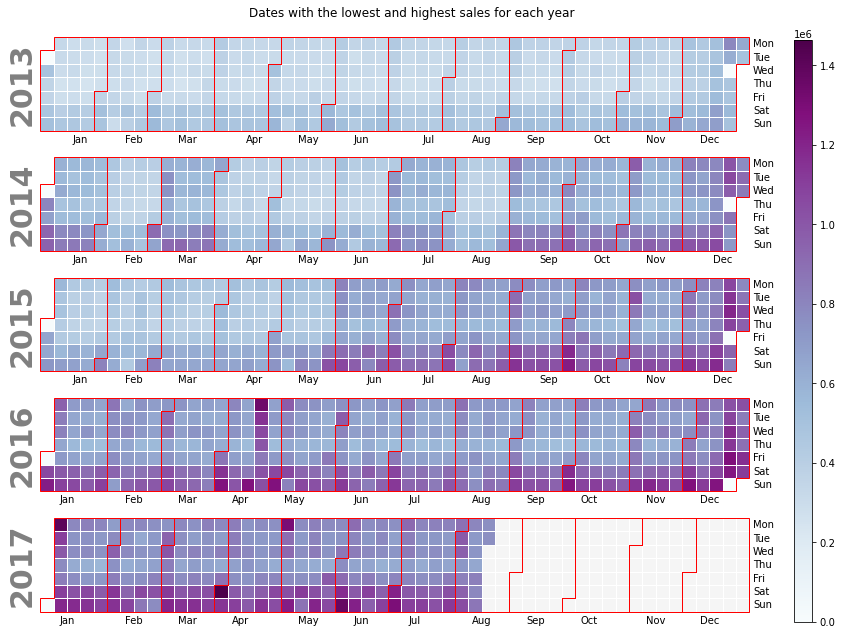

In [47]:
plot = calplot.calplot(data = df2['sales'], how = 'sum' , cmap='BuPu',edgecolor='Red' ,suptitle='Dates with the lowest and highest sales for each year')

**Based on the figure above, we have divided the entire time frame into years and those years into months. The names of the days are displayed on the y-axis, and the color gradient indicates the volume of sales. Darker hues tend to increase sales whereas lighter colors tend to decrease sales.**

**We may infer from the plot that sales rise as the months pass, with December recording the highest sales. While sales are primarily made on weekends and on Mondays during the week**

In [48]:
!pip install squarify

# Q3. Which City is having most number of stores

In [49]:
#adding 'city' column from the store data to the merged data

merged_data["City"] = merged_data['store_nbr'].map({54: 'El Carmen',53: 'Manta',52: 'Manta',51: 'Guayaquil', 50: 'Ambato',
                                              49:'Quito', 48: 'Quito',47: 'Quito', 46: 'Quito', 45: 'Quito', 45: 'Quito',
                                             44:'Quito', 43:'Esmeraldas', 42:'Cuenca', 41:'Machala', 40:'Machala', 39:'Cuenca',
                                             38:'Loja', 37:'Cuenca',36:'Libertad', 35: 'Playas', 34:'Guayaquil', 33:'Quevedo',
                                              32:'Guayaquil', 31:'Babahoyo', 30:'Guayaquil', 29:'Guayaquil', 28:'Guayaquil',
                                              27:'Daule', 26:'Guayaquil',25:'Salinas', 24:'Guayaquil', 23:'Ambato', 22:'Puyo',
                                             21:'Santo Domingo', 20:'Quito', 19:'Guaranda', 18:'Quito', 17:'Quito', 16:'Santo Domingo',
                                             15:'Ibarra', 14:'Riobamba', 13:'Latacunga',12:'Latacunga', 11:'Cayambe', 10:'Quito',9:'Quito',
                                             8:'Quito',7:'Quito',6:'Quito',5:'Santo Domingo',4:'Quito', 3:'Quito', 2:'Quito', 1:'Quito'})
merged_data

,store_nbr,family,sales,onpromotion,sales_date,City
0,1,AUTOMOTIVE,0.0,0.0,2013-01-01,Quito
1,1,BABY CARE,0.0,0.0,2013-01-01,Quito
2,1,BEAUTY,0.0,0.0,2013-01-01,Quito
3,1,BEVERAGES,0.0,0.0,2013-01-01,Quito
4,1,BOOKS,0.0,0.0,2013-01-01,Quito
...,...,...,...,...,...,...
7123,9,POULTRY,0.0,0.0,2014-12-25,Quito
7124,9,PREPARED FOODS,0.0,0.0,2014-12-25,Quito
7125,9,PRODUCE,0.0,0.0,2014-12-25,Quito
7126,9,SCHOOL AND OFFICE SUPPLIES,0.0,0.0,2014-12-25,Quito


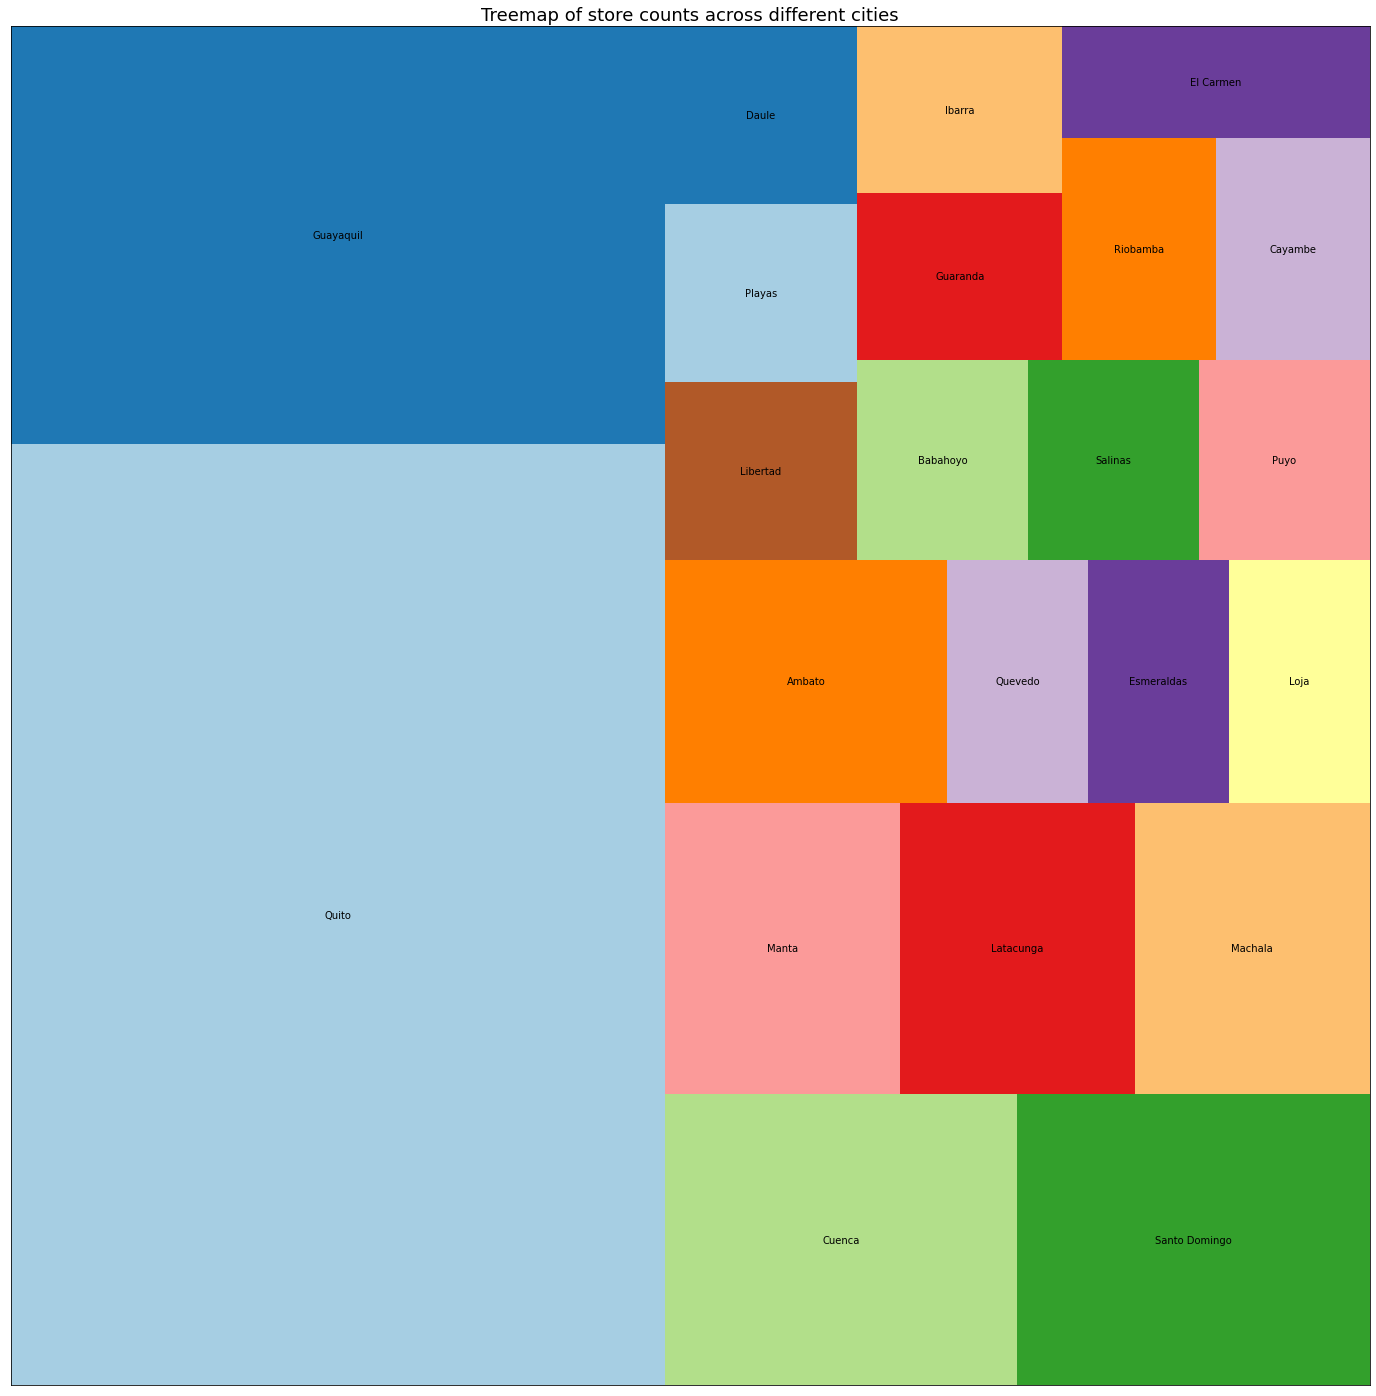

In [50]:
fig = plt.figure(figsize=(25, 21))
CITY=stores_data.city.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=CITY['city'].values,label=CITY.index,
              color=sns.color_palette('Paired', 28), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of store counts across different cities", fontsize=18)
plt.show();

**Quito is having most number of stores**

# Q4. What are the Monthly sales trend throughout the years / Are sales      affected by promotions

In [51]:
#converting 'onpromotion' to i
merged_data['onpromotion']=merged_data['onpromotion'].apply(int)
merged_data['onpromotion']

0       0
1       0
2       0
3       0
4       0
       ..
7123    0
7124    0
7125    0
7126    0
7127    0
Name: onpromotion, Length: 3008016, dtype: int64

In [52]:
merged_data

,store_nbr,family,sales,onpromotion,sales_date,City
0,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito
1,1,BABY CARE,0.0,0,2013-01-01,Quito
2,1,BEAUTY,0.0,0,2013-01-01,Quito
3,1,BEVERAGES,0.0,0,2013-01-01,Quito
4,1,BOOKS,0.0,0,2013-01-01,Quito
...,...,...,...,...,...,...
7123,9,POULTRY,0.0,0,2014-12-25,Quito
7124,9,PREPARED FOODS,0.0,0,2014-12-25,Quito
7125,9,PRODUCE,0.0,0,2014-12-25,Quito
7126,9,SCHOOL AND OFFICE SUPPLIES,0.0,0,2014-12-25,Quito


In [53]:
def promo(x):
    b=str(x)
    if '0' in b:
        return 'NO_PROMO'

    else:
        return 'PROMO'

In [54]:
merged_data['onpromotion']=merged_data['onpromotion'].apply( promo)
merged_data['onpromotion']

0       NO_PROMO
1       NO_PROMO
2       NO_PROMO
3       NO_PROMO
4       NO_PROMO
          ...   
7123    NO_PROMO
7124    NO_PROMO
7125    NO_PROMO
7126    NO_PROMO
7127    NO_PROMO
Name: onpromotion, Length: 3008016, dtype: object

In [55]:
merged_data

,store_nbr,family,sales,onpromotion,sales_date,City
0,1,AUTOMOTIVE,0.0,NO_PROMO,2013-01-01,Quito
1,1,BABY CARE,0.0,NO_PROMO,2013-01-01,Quito
2,1,BEAUTY,0.0,NO_PROMO,2013-01-01,Quito
3,1,BEVERAGES,0.0,NO_PROMO,2013-01-01,Quito
4,1,BOOKS,0.0,NO_PROMO,2013-01-01,Quito
...,...,...,...,...,...,...
7123,9,POULTRY,0.0,NO_PROMO,2014-12-25,Quito
7124,9,PREPARED FOODS,0.0,NO_PROMO,2014-12-25,Quito
7125,9,PRODUCE,0.0,NO_PROMO,2014-12-25,Quito
7126,9,SCHOOL AND OFFICE SUPPLIES,0.0,NO_PROMO,2014-12-25,Quito


In [56]:
# Extracting year, month, day and week, and making new column
merged_data['Year'] = pd.to_datetime(merged_data['sales_date']).dt.year
merged_data['Month'] = pd.to_datetime(merged_data['sales_date']).dt.month
merged_data['Day'] = pd.to_datetime(merged_data['sales_date']).dt.day
merged_data['WeekOfYear'] = pd.to_datetime(merged_data['sales_date']).dt.isocalendar().week
merged_data

,store_nbr,family,sales,onpromotion,sales_date,City,Year,Month,Day,WeekOfYear
0,1,AUTOMOTIVE,0.0,NO_PROMO,2013-01-01,Quito,2013,1,1,1
1,1,BABY CARE,0.0,NO_PROMO,2013-01-01,Quito,2013,1,1,1
2,1,BEAUTY,0.0,NO_PROMO,2013-01-01,Quito,2013,1,1,1
3,1,BEVERAGES,0.0,NO_PROMO,2013-01-01,Quito,2013,1,1,1
4,1,BOOKS,0.0,NO_PROMO,2013-01-01,Quito,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...
7123,9,POULTRY,0.0,NO_PROMO,2014-12-25,Quito,2014,12,25,52
7124,9,PREPARED FOODS,0.0,NO_PROMO,2014-12-25,Quito,2014,12,25,52
7125,9,PRODUCE,0.0,NO_PROMO,2014-12-25,Quito,2014,12,25,52
7126,9,SCHOOL AND OFFICE SUPPLIES,0.0,NO_PROMO,2014-12-25,Quito,2014,12,25,52


C:\Users\USER\anaconda3\envs\pythonEnv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


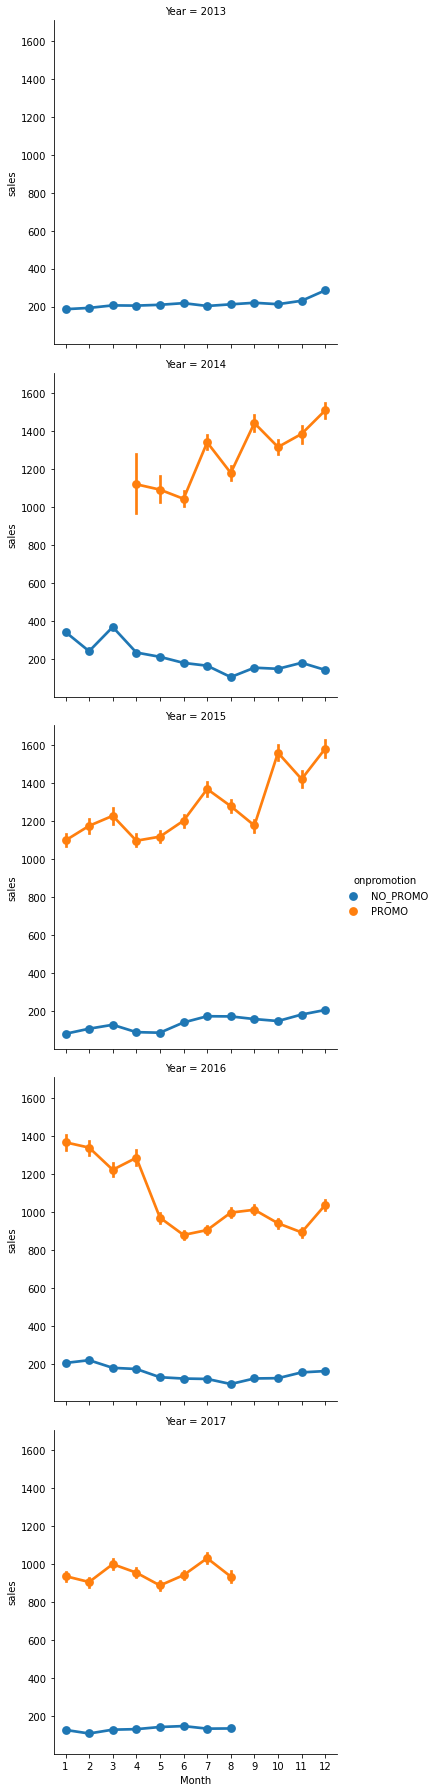

In [57]:
# Sales trend over the months
sns.factorplot(data=merged_data, x ='Month', y = 'sales', 
               # per store type in cols
               hue = 'onpromotion',
               row = 'Year'
              );

 **2013:**
**Without Promotion We can see from the above 2013 trends that sales tend to spike from November to December.**


**2014:**
**Absent Promotion According to the 2014 trends mentioned above, sales began to fall in March, increased in August and October, and then started to decline again from November through December.**
    
   **Sales increased as a result of the promotion. Although sales tend to spike from October to December, they were also dynamic.**


**2015:**
**Without Promotion  the above 2015 trends shows that sales were dynamic but tends to spike from October to December**
    
   **Sales increased as a result of the promotion. Although they typically increased from November through December, sales were also dynamic.**
    
**2016:**
**With absent Promotion, According to the 2016 trends above, sales started out falling in January and continued to do so until August.**
    
   **Sales increased as a result of the promotion. Sales also began to drop from January to May, although they typically start to rise from June.**
    
**2017:**
**With absent Promotion According to the 2017 trends shown above, there was a subsequent, significant increase starting in February. Later, it dropped from June.**
    
   **Sales increased as a result of the promotion. Sales also fluctuated.** 

**8 Months sales were recorded in 2017**

# Q5. What family is with the least and most sales?

In [58]:
#grouping family by it sales
groupby_Family= merged_data.groupby('family').sales.agg(['sum']).sort_values(by=['sum'],ascending=False)
groupby_Family

,sum
family,
GROCERY I,3.434627e+08
BEVERAGES,2.169545e+08
PRODUCE,1.227047e+08
CLEANING,9.752129e+07
DAIRY,6.448771e+07
BREAD/BAKERY,4.213395e+07
POULTRY,3.187600e+07
MEATS,3.108647e+07
PERSONAL CARE,2.459205e+07


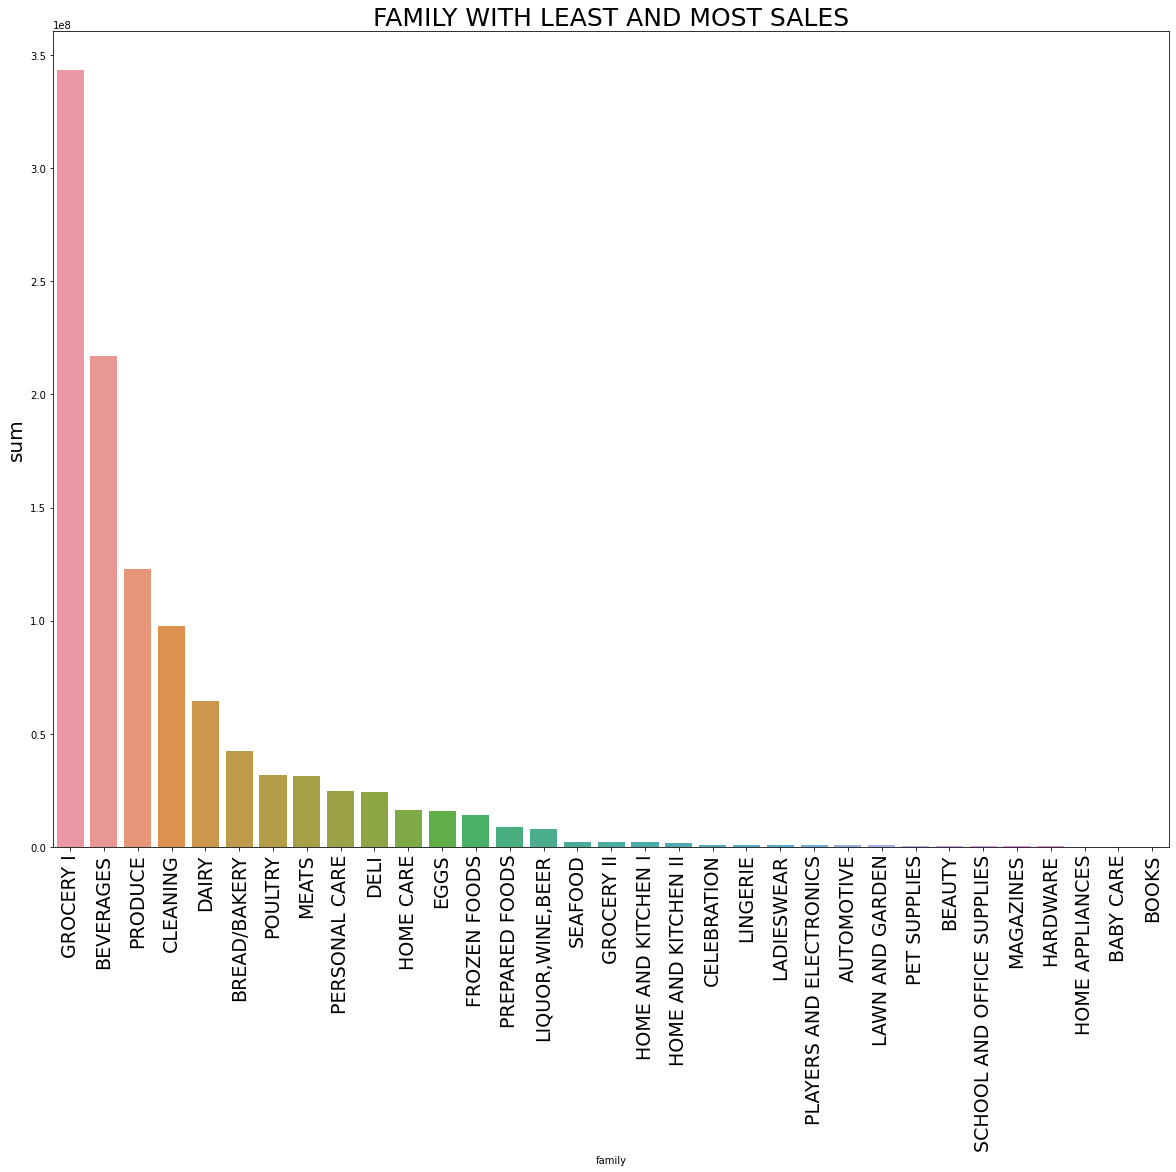

In [59]:
plt.figure(figsize=(20,15))
plt.title('FAMILY WITH LEAST AND MOST SALES',fontsize=25)
plt.xticks(fontsize=19,rotation='vertical')
plt.ylabel('SALES',fontsize=20)
sns.barplot(x=groupby_Family.index,y=(groupby_Family['sum']))#,data=top_20_startups)
plt.savefig('family_sales.png',dpi=300)
plt.show()

**now we are having the grocery family to have the most sales and the books family having the least sales throughout years.**

**Grocery is having the highest demand throughout the years whiles books are having the least demand.**

# Q6. what is the most sold family on Christmas

**we will take the year 2014 and 2015 data as sample data for our visualization**

In [60]:
#Sales during christmas in 2014
christmas_2014 =merged_data[( merged_data['sales_date'] >= '2014-12-24')  &  (merged_data['sales_date']<= '2014-12-25')]
christmas_2014.head()

,store_nbr,family,sales,onpromotion,sales_date,City,Year,Month,Day,WeekOfYear
1284822,1,AUTOMOTIVE,6.0,NO_PROMO,2014-12-24,Quito,2014,12,24,52
1284823,1,BABY CARE,0.0,NO_PROMO,2014-12-24,Quito,2014,12,24,52
1284824,1,BEAUTY,5.0,NO_PROMO,2014-12-24,Quito,2014,12,24,52
1284825,1,BEVERAGES,2117.0,PROMO,2014-12-24,Quito,2014,12,24,52
1284826,1,BOOKS,0.0,NO_PROMO,2014-12-24,Quito,2014,12,24,52


In [61]:
Christmas_sales_2014= christmas_2014.groupby('family').sales.agg(['sum']).sort_values(by=['sum'],ascending=False)
Christmas_sales_2014

,sum
family,
GROCERY I,297332.638000
BEVERAGES,170693.000000
PRODUCE,158570.237900
CLEANING,70859.000000
FROZEN FOODS,58964.375810
DAIRY,46444.000000
POULTRY,30218.662950
BREAD/BAKERY,22951.619020
"LIQUOR,WINE,BEER",20229.000000


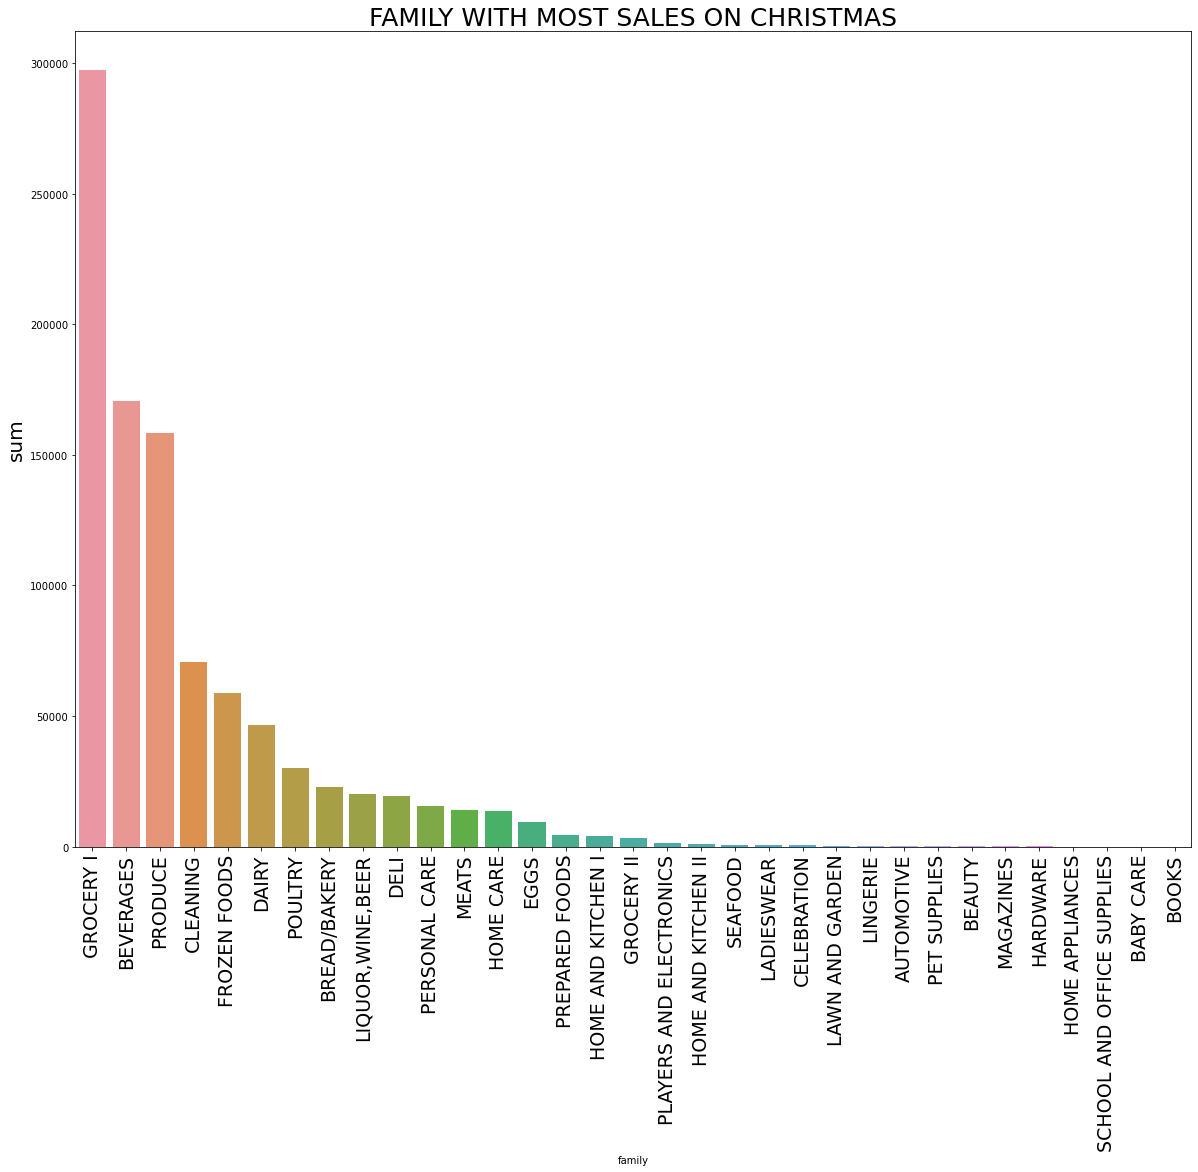

In [62]:
plt.figure(figsize=(20,15))
plt.title('FAMILY WITH MOST SALES ON CHRISTMAS',fontsize=25)
plt.xticks(fontsize=19,rotation='vertical')
plt.ylabel('SALES',fontsize=20)
sns.barplot(x=Christmas_sales_2014.index,y=(Christmas_sales_2014['sum']))#,data=top_20_startups)
plt.savefig('family_sales.png',dpi=300)
plt.show()

In [63]:
#Sales during christmas in 2015
christmas_2015 =merged_data[( merged_data['sales_date'] >= '2015-12-24')  &  (merged_data['sales_date']<= '2015-12-25')]
christmas_2015.head()

,store_nbr,family,sales,onpromotion,sales_date,City,Year,Month,Day,WeekOfYear
1933470,1,AUTOMOTIVE,4.0,NO_PROMO,2015-12-24,Quito,2015,12,24,52
1933471,1,BABY CARE,0.0,NO_PROMO,2015-12-24,Quito,2015,12,24,52
1933472,1,BEAUTY,2.0,NO_PROMO,2015-12-24,Quito,2015,12,24,52
1933473,1,BEVERAGES,2221.0,PROMO,2015-12-24,Quito,2015,12,24,52
1933474,1,BOOKS,0.0,NO_PROMO,2015-12-24,Quito,2015,12,24,52


In [64]:
#grouping family by it sales
Christmas_sales_2015= christmas_2015.groupby('family').sales.agg(['sum']).sort_values(by=['sum'],ascending=False)
Christmas_sales_2015

,sum
family,
GROCERY I,341425.748000
BEVERAGES,191789.000000
PRODUCE,177912.134200
CLEANING,77408.000000
FROZEN FOODS,56100.756050
DAIRY,55644.000000
POULTRY,29231.031990
BREAD/BAKERY,24331.842980
"LIQUOR,WINE,BEER",23642.000000


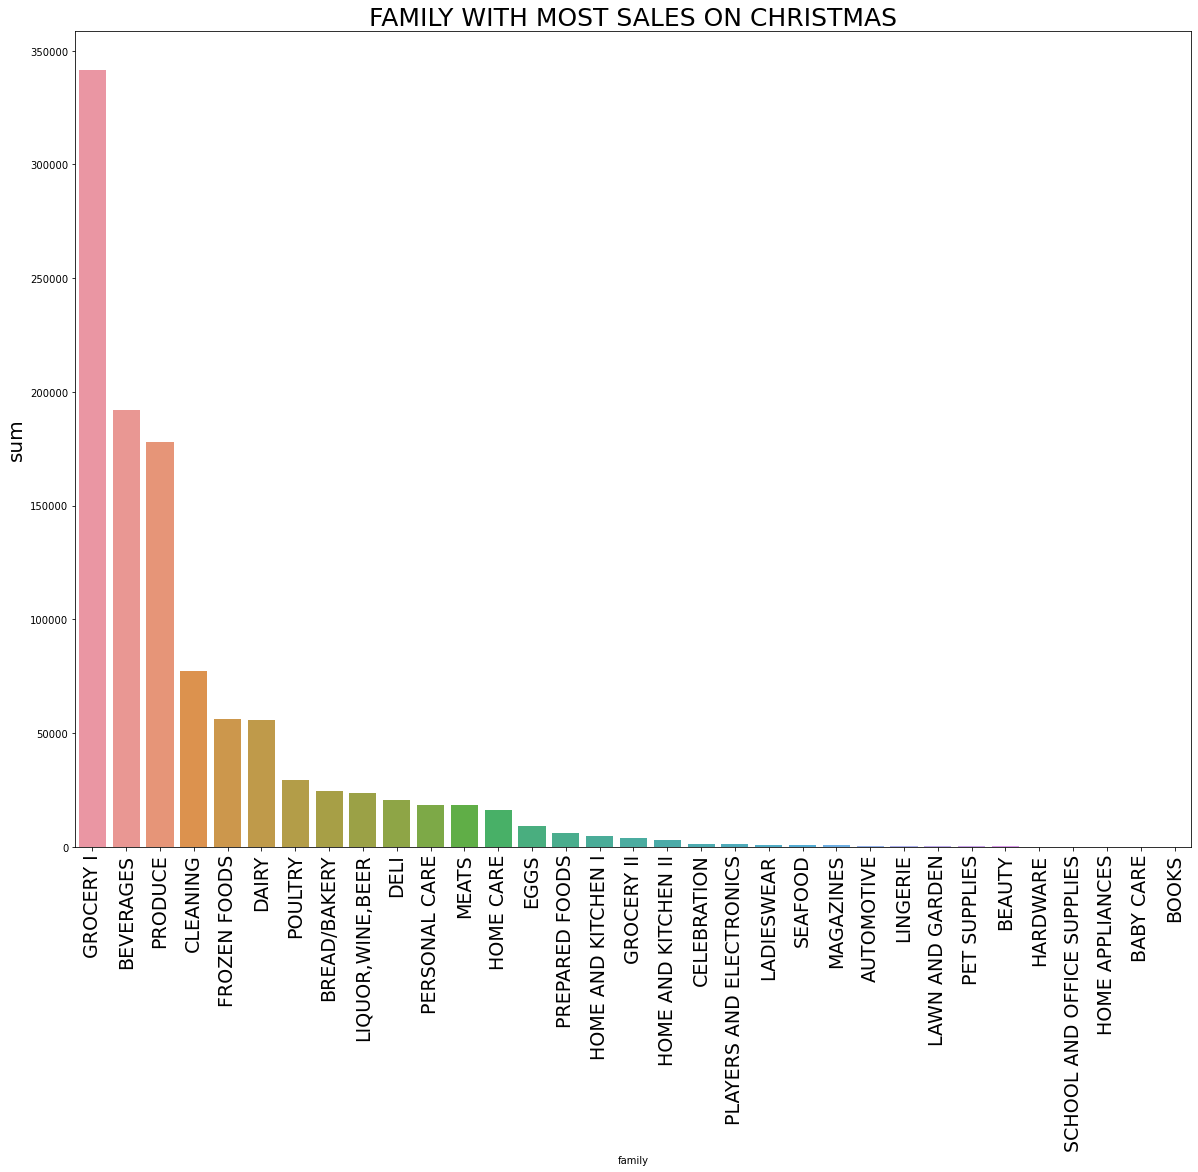

In [65]:
plt.figure(figsize=(20,15))
plt.title('FAMILY WITH MOST SALES ON CHRISTMAS',fontsize=25)
plt.xticks(fontsize=19,rotation='vertical')
plt.ylabel('SALES',fontsize=20)
sns.barplot(x=Christmas_sales_2015.index,y=(Christmas_sales_2015['sum']))
plt.savefig('family_sales.png',dpi=300)
plt.show()

**grocery family is having the most sales and the books family having the least sales on christmas days.**

**Demand of Grocery is still high on christmas days.**

# Q7. Are certain stores selling more products?

In [66]:
 merged_data['store_nbr'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3008016 entries, 0 to 7127
Series name: store_nbr
Non-Null Count    Dtype
--------------    -----
3008016 non-null  int64
dtypes: int64(1)
memory usage: 45.9 MB


In [67]:
merged_data['store_nbr']= merged_data['store_nbr'].apply(str)
merged_data['store_nbr']

0       1
1       1
2       1
3       1
4       1
       ..
7123    9
7124    9
7125    9
7126    9
7127    9
Name: store_nbr, Length: 3008016, dtype: object

In [68]:
 merged_data['store_nbr'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3008016 entries, 0 to 7127
Series name: store_nbr
Non-Null Count    Dtype 
--------------    ----- 
3008016 non-null  object
dtypes: object(1)
memory usage: 45.9+ MB


In [69]:
 merged_data['sales'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3008016 entries, 0 to 7127
Series name: sales
Non-Null Count    Dtype  
--------------    -----  
3008016 non-null  float64
dtypes: float64(1)
memory usage: 45.9 MB


In [70]:
groupby_stores= merged_data.groupby('store_nbr').sales.agg(['sum']).sort_values(by=['sum'],ascending=False)
groupby_stores

,sum
store_nbr,
44,6.208755e+07
45,5.449801e+07
47,5.094831e+07
3,5.048191e+07
49,4.342010e+07
46,4.189606e+07
48,3.593313e+07
51,3.291149e+07
8,3.049429e+07


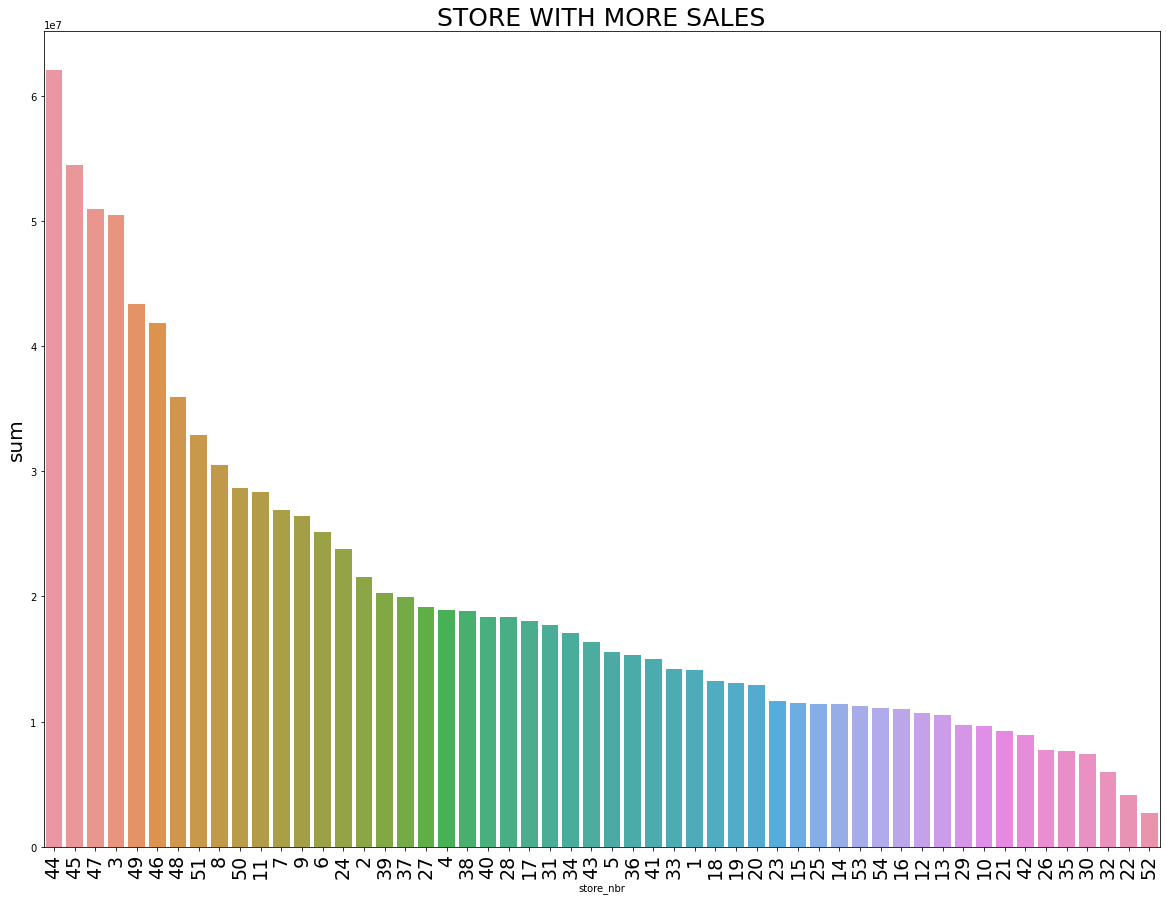

In [71]:
plt.figure(figsize=(20,15))
plt.title('STORE WITH MORE SALES',fontsize=25)
plt.xticks(fontsize=19,rotation='vertical')
plt.ylabel('SALES',fontsize=20)
sns.barplot(x=groupby_stores.index,y=(groupby_stores['sum']))#,data=top_20_startups)
plt.savefig('store_sales.png',dpi=300)
plt.show()

# Q8. Did the earthquake strike on ecuador on April 16, 2016 had a negative impact on sales?

In [72]:
merged_data['sales_date'] = pd.to_datetime(merged_data['sales_date'])

In [73]:
merged_data['sales_date']= merged_data['sales_date'].astype(str)

In [74]:
#Average sales before earthquake ,i.e 2016-04-01 to 2016-04-15
before_earthquake =merged_data[( merged_data['sales_date'] > '2016-04-01') &  (merged_data['sales_date']<= '2016-04-15')]
before_earthquake

,store_nbr,family,sales,onpromotion,sales_date,City,Year,Month,Day,WeekOfYear
2109888,1,AUTOMOTIVE,6.000000,NO_PROMO,2016-04-02,Quito,2016,4,2,13
2109889,1,BABY CARE,0.000000,NO_PROMO,2016-04-02,Quito,2016,4,2,13
2109890,1,BEAUTY,3.000000,NO_PROMO,2016-04-02,Quito,2016,4,2,13
2109891,1,BEVERAGES,2317.000000,PROMO,2016-04-02,Quito,2016,4,2,13
2109892,1,BOOKS,0.000000,NO_PROMO,2016-04-02,Quito,2016,4,2,13
...,...,...,...,...,...,...,...,...,...,...
2134831,9,POULTRY,407.525000,PROMO,2016-04-15,Quito,2016,4,15,15
2134832,9,PREPARED FOODS,63.760002,PROMO,2016-04-15,Quito,2016,4,15,15
2134833,9,PRODUCE,987.550000,PROMO,2016-04-15,Quito,2016,4,15,15
2134834,9,SCHOOL AND OFFICE SUPPLIES,5.000000,NO_PROMO,2016-04-15,Quito,2016,4,15,15


In [75]:
#finding the average sales before earthquake
avg_before_earthquake = before_earthquake['sales'].mean()
avg_before_earthquake

445.007176512935

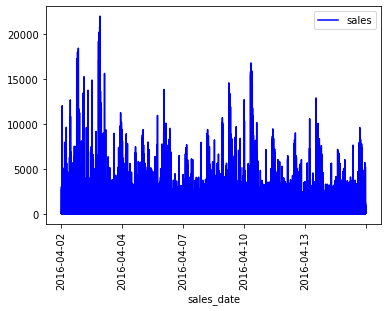

In [76]:
first_plot = before_earthquake.plot(x='sales_date',y='sales',kind='line',color='blue',rot=90)
plt.legend()
plt.show()

In [77]:
#Average sales after earthquake ,i.e from 2016-04-17 going
after_earthquake =merged_data[( merged_data['sales_date'] > '2016-04-17') &  (merged_data['sales_date']<= '2016-04-30')]
after_earthquake

,store_nbr,family,sales,onpromotion,sales_date,City,Year,Month,Day,WeekOfYear
2138400,1,AUTOMOTIVE,14.00000,NO_PROMO,2016-04-18,Quito,2016,4,18,16
2138401,1,BABY CARE,0.00000,NO_PROMO,2016-04-18,Quito,2016,4,18,16
2138402,1,BEAUTY,3.00000,NO_PROMO,2016-04-18,Quito,2016,4,18,16
2138403,1,BEVERAGES,4155.00000,PROMO,2016-04-18,Quito,2016,4,18,16
2138404,1,BOOKS,0.00000,NO_PROMO,2016-04-18,Quito,2016,4,18,16
...,...,...,...,...,...,...,...,...,...,...
2161561,9,POULTRY,826.35300,NO_PROMO,2016-04-30,Quito,2016,4,30,17
2161562,9,PREPARED FOODS,165.65399,NO_PROMO,2016-04-30,Quito,2016,4,30,17
2161563,9,PRODUCE,2012.72700,PROMO,2016-04-30,Quito,2016,4,30,17
2161564,9,SCHOOL AND OFFICE SUPPLIES,10.00000,NO_PROMO,2016-04-30,Quito,2016,4,30,17


In [78]:
#finding the average sales after earthquake
avg_after_earthquake = after_earthquake['sales'].mean()
avg_after_earthquake

511.72250327857483

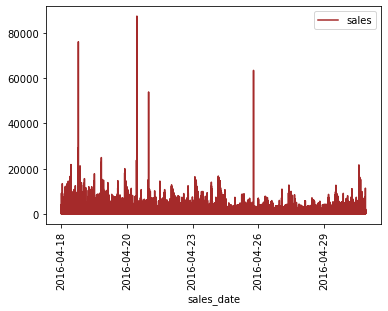

In [79]:
second_plot = after_earthquake.plot(x='sales_date',y='sales',kind='line',color='brown',rot=90)
plt.legend()
plt.show()

**The earthquake strike on ecuador on April 16, 2016 didn't have a negative impact on sales**

# FEATURE ENGINEERING FOR MODELLING

**MERGING ALL DATASET**

In [80]:
merged_data

,store_nbr,family,sales,onpromotion,sales_date,City,Year,Month,Day,WeekOfYear
0,1,AUTOMOTIVE,0.0,NO_PROMO,2013-01-01,Quito,2013,1,1,1
1,1,BABY CARE,0.0,NO_PROMO,2013-01-01,Quito,2013,1,1,1
2,1,BEAUTY,0.0,NO_PROMO,2013-01-01,Quito,2013,1,1,1
3,1,BEVERAGES,0.0,NO_PROMO,2013-01-01,Quito,2013,1,1,1
4,1,BOOKS,0.0,NO_PROMO,2013-01-01,Quito,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...
7123,9,POULTRY,0.0,NO_PROMO,2014-12-25,Quito,2014,12,25,52
7124,9,PREPARED FOODS,0.0,NO_PROMO,2014-12-25,Quito,2014,12,25,52
7125,9,PRODUCE,0.0,NO_PROMO,2014-12-25,Quito,2014,12,25,52
7126,9,SCHOOL AND OFFICE SUPPLIES,0.0,NO_PROMO,2014-12-25,Quito,2014,12,25,52


In [81]:
stores_data['store_nbr']= stores_data['store_nbr'].astype(str)
merged_data['store_nbr']= merged_data['store_nbr'].astype(str)

In [82]:
train_data['store_nbr']= train_data['store_nbr'].astype(str)

In [83]:
Train1=pd.merge(train_data,stores_data, on= 'store_nbr')
Train1

,id,date,store_nbr,family,sales,onpromotion,sales_date,city,state,type_no,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013-01-01,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,2013-01-01,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,2013-01-01,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013-01-01,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,2013-01-01,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017-08-15,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017-08-15,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017-08-15,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017-08-15,Quito,Pichincha,B,6


In [84]:
Train1=pd.merge(Train1, oil_data, on= 'sales_date')
Train1

,id,date_x,store_nbr,family,sales,onpromotion,sales_date,city,state,type_no,cluster,date_y,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013-01-01,Quito,Pichincha,D,13,1/1/2013,93.14
1,1,2013-01-01,1,BABY CARE,0.000,0,2013-01-01,Quito,Pichincha,D,13,1/1/2013,93.14
2,2,2013-01-01,1,BEAUTY,0.000,0,2013-01-01,Quito,Pichincha,D,13,1/1/2013,93.14
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013-01-01,Quito,Pichincha,D,13,1/1/2013,93.14
4,4,2013-01-01,1,BOOKS,0.000,0,2013-01-01,Quito,Pichincha,D,13,1/1/2013,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143741,3000883,2017-08-15,9,POULTRY,438.133,0,2017-08-15,Quito,Pichincha,B,6,8/15/2017,47.57
2143742,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017-08-15,Quito,Pichincha,B,6,8/15/2017,47.57
2143743,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017-08-15,Quito,Pichincha,B,6,8/15/2017,47.57
2143744,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017-08-15,Quito,Pichincha,B,6,8/15/2017,47.57


In [85]:
#checking completeness of date for holiday
expected_dates = pd.date_range(start=train_data['sales_date'].min()  , end=train_data['sales_date'].max())
expected_dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [86]:
#finding missing holiday dates
missing_holiday_dates = set(expected_dates.date)-set(holidays_data['sales_date'].unique())
missing_holiday_dates

{datetime.date(2017, 6, 24),
 datetime.date(2013, 12, 27),
 datetime.date(2013, 9, 24),
 datetime.date(2015, 10, 28),
 datetime.date(2014, 5, 18),
 datetime.date(2013, 12, 20),
 datetime.date(2017, 8, 6),
 datetime.date(2013, 4, 27),
 datetime.date(2014, 3, 18),
 datetime.date(2015, 10, 24),
 datetime.date(2014, 3, 12),
 datetime.date(2013, 6, 12),
 datetime.date(2014, 8, 16),
 datetime.date(2017, 7, 29),
 datetime.date(2013, 1, 3),
 datetime.date(2013, 10, 14),
 datetime.date(2016, 9, 20),
 datetime.date(2013, 10, 12),
 datetime.date(2016, 1, 12),
 datetime.date(2016, 12, 11),
 datetime.date(2017, 1, 13),
 datetime.date(2016, 3, 1),
 datetime.date(2014, 7, 11),
 datetime.date(2016, 2, 1),
 datetime.date(2013, 8, 13),
 datetime.date(2013, 12, 28),
 datetime.date(2017, 6, 26),
 datetime.date(2013, 5, 23),
 datetime.date(2014, 11, 15),
 datetime.date(2017, 6, 12),
 datetime.date(2017, 6, 5),
 datetime.date(2017, 3, 13),
 datetime.date(2015, 3, 7),
 datetime.date(2013, 6, 19),
 datetime.d

In [87]:
#adding missing holidays
found_holidays =pd.DataFrame(missing_holiday_dates, columns=['sales_date'])
found_holidays

,sales_date
0,2017-06-24
1,2013-12-27
2,2013-09-24
3,2015-10-28
4,2014-05-18
...,...
1427,2016-05-25
1428,2017-05-02
1429,2013-04-07
1430,2016-07-30


**to be continued...**